In [4]:
import torch
import torchsummary
from torchsummary import summary
from torchvision import models

import copy
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
import os
import yaml
import json

from utils.helper_functions import *

import pylab
# pylab.rc('font', family='serif', size=14)

import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

resultsdir = path_prefix + '/Results/Symbio/Symbio/'

savefigsdir = path_prefix + '/Results/FFA_Symbio2023'

selected_config_keys = ['archd', 'arche','batch_size','patienced', 'patiencee','wdB', 
                        'wdF' ,'optimizerB', 'optimizerF','dataset',
'lrB', 'lrF', 'momentumB', 'momentumF','base_channels','epochs','runname']

In [10]:
from utils.helper_functions import *

figsavedir = '/home/tt2684/Research/Results/FFA_Symbio2023/Figures/Fig3_Robustness_Evals/'


In [9]:
alpha = 0.4
colors = {'FA':'mediumseagreen', 'BP':'k', 'SLVanilla':'indianred'}
method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'FFA'}
linestyles = {'FA':'-', 'BP':'-', 'SLVanilla':'-'}

## Evaluations

In [ ]:
## 

In [52]:
import json
import pandas as pd

measure_name = 'correlation' #'correlation' #'accuracy'

    
if measure_name == 'accuracy':
    measure_key = 'Test_acce'
elif measure_name == 'correlation':
    measure_key = 'Test_corrd'

methods = ['SLVanilla','BP', 'FA']

# if 'AsymResLNet' in hashname:
#     markers = {'FA':'o', 'BP':'o', 'SLVanilla':'o'}
# elif 'FullyConn' in hashname:
#     markers = {'FA':'s', 'BP':'s', 'SLVanilla':'s'}

facecolors = {'FA':'none', 'BP':'k', 'SLVanilla':'red'}


def get_df_evaluate(runname,measure_name, master_df,master_df_autoencoder,master_df_autoencodertwocosts):
    
    assert os.path.exists(resultsdir + '%s/evaluate/'%runname), 'no eval for runname %s'%runname
    if measure_name == 'accuracy':
        measure_key = 'Test_acce'
    elif measure_name == 'correlation':
        measure_key = 'Test_corrd'
    
    
    print(runname)
    df = pd.DataFrame()
    df_autoencoder = pd.DataFrame()
    df_autoencoder_tc = pd.DataFrame()
    df_dynamic = pd.DataFrame()
    list_files = getListOfFiles(resultsdir + '%s/evaluate/'%runname)
    list_files = [l for l in list_files if '.json' in l]

    for l in list_files:

        fname = l.split('evaluate/')[1]


        with open(l, "r") as jfile:
            try:
                d = json.load(jfile)
            except UnicodeDecodeError:
                print(l)
                d = json.load(jfile)

        if ('autoencoder' not in l) and ('dynamicdecoder' not in l):

            df2 = pd.DataFrame({'method': d['method'],
                     'epsilon':[d['eval_epsilon']],
                     'sigma2':[d['eval_sigma2']],
                     'itr0': [d[measure_key][0]],
                     'itr1': [d[measure_key][1]],
                     'itr2': [d[measure_key][2]],
                     'itr3': [d[measure_key][3]]})
            df = df.append(df2, ignore_index=True)
        elif 'autoencoder_staticdecoder' in l:
            df2_autoencoder = pd.DataFrame({'method': d['method'],
                     'epsilon':[d['eval_epsilon']],
                     'sigma2':[d['eval_sigma2']],
                     'itr0': [d[measure_key][0]],
                     'itr1': [d[measure_key][1]],
                     'itr2': [d[measure_key][2]],
                     'itr3': [d[measure_key][3]]})
            df_autoencoder = df_autoencoder.append(df2_autoencoder, ignore_index=True)

        elif 'autoencoder_twocosts_staticdecoder' in l:
            df2_autoencoder_tc = pd.DataFrame({'method': d['method'],
                     'epsilon':[d['eval_epsilon']],
                     'sigma2':[d['eval_sigma2']],
                     'itr0': [d[measure_key][0]],
                     'itr1': [d[measure_key][1]],
                     'itr2': [d[measure_key][2]],
                     'itr3': [d[measure_key][3]]})
            df_autoencoder_tc = df_autoencoder_tc.append(df2_autoencoder_tc, ignore_index=True)

#             elif 'dynamicdecoder' in l:

#                 df2_dynamic = pd.DataFrame({'method': d['method'],
#                          'epsilon':[d['eval_epsilon']],
#                          'sigma2':[d['eval_sigma2']],
#                          'itr0': [d[measure_key][0]],
#                          'itr1': [d[measure_key][1]],
#                          'itr2': [d[measure_key][2]],
#                          'itr3': [d[measure_key][3]]})
#                 df_dynamic = df_dynamic.append(df2_dynamic, ignore_index=True)
    #if df is not empty

    return df, df_autoencoder, df_autoencoder_tc

## By hash

In [100]:
import json
import pandas as pd

hashname= 'RMSpRMSpMNISTAsymResLNet10BNaffine'

# for CIFAR10: 'asymresnet18_893'
# for MNIST: 'RMSpRMSpMNISTAsymResLNet10BNaffine'

#'RMSpRMSpMNISTAsymResLNet10BNaff3'

#'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'asymresnet18_893' # 
#'AsymResNetL10Simple'  #'asymresnet18_893'# 


measure_name = 'accuracy'  #'correlation' #'accuracy'

# 'TwoCostAEcontrolMNISTCorrSchedulBHModu' #'TwoCostAEcontrolMNIST'
#'asymresnet18_893' #'TwoCostAEcontrolMNISTCorrSchedul' #'hypsaymresnet18lr' #'TwoCostAEcontrolMNISTCorrSchedul'
#'TwoCostAEcontrolMNIST'#'hypersearchRMSprop' #
# 'RMSpRMSpMNISTAsymResLNet10BNaffine'#'RMSpRMSpMNISTAsymResLNet10BNaffine' #'RMSpRMSpMNISTAsymResLNet10BNaff3'
# 'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30'
# 'RMSpropRMSpropMNISTAsymResLNet10'


with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname) as f:
    Lines = f.readlines() 

valid_runnames = {}
valid_runnames_autoencoder = {}
valid_runnames_autoencoder_tc = {}
valid_runnames_dynamic = {}


master_df = pd.DataFrame()
master_df_autoencoder = pd.DataFrame()
master_df_autoencodertwocosts = pd.DataFrame()
master_df_dynamic = pd.DataFrame()
for l in Lines:
    
    runname = l.strip('\n')
    columns = ['method', 'epsilon','sigma', 'itr0','itr1','itr2','itr3']
    
    
    configs = yaml.safe_load(open(resultsdir + '%s/configs.yml'%runname, 'r'))
    list_csv_paths = []
#     print(path_prefix + '/Results/Symbio/Symbio/%s/evaluate/'%runname)

    if os.path.exists(resultsdir + '%s/evaluate/'%runname):
        df, df_autoencoder, df_autoencoder_tc = get_df_evaluate(runname, measure_name,master_df,master_df_autoencoder,
                                                                master_df_autoencodertwocosts  )
        
        if len(df.columns)>0:
            
            print(np.unique(df['method']))
            if np.all([m in list(df['method']) for m in methods]):
                    valid_runnames[runname] = runname
                    master_df = master_df.append(df)
            # if there are autoencoder runs
            if len(df_autoencoder.columns)>0:
                if np.all([m in list(df_autoencoder['method']) for m in ['FA','BP']]):
                    valid_runnames_autoencoder[runname] = runname
                    master_df_autoencoder = master_df_autoencoder.append(df_autoencoder)

    #         if len(df_autoencoder_tc.columns)>0:
    #             if np.all([m in list(df_autoencoder_tc['method']) for m in ['FA','BP']]):
    #                 valid_runnames_autoencoder_tc[runname] = runname
    #                 master_df_autoencodertwocosts = master_df_autoencodertwocosts.append(df_autoencoder_tc)
                   # if there are autoencoder runs
    #         if len(df_dynamic.columns)>0:
    #             if np.all([m in list(df_dynamic['method']) for m in ['FA','BP']]):
    #                 valid_runnames_dynamic[runname] = runname
    #                 master_df_dynamic = master_df_dynamic.append(df_dynamic)
    else:
        print('no eval for runname %s'%runname)

print(measure_name)
print('number of valid runs',len(valid_runnames))
print('number of valid autoencoder runs',len(valid_runnames_autoencoder))
print('number of valid autoencoder twocosts runs',len(valid_runnames_autoencoder_tc))
# print('number of valid dynamic runs',len(valid_runnames_dynamic))
print('*** make sure the evaluation was done after the training was completed ***')

Oct06-10-49_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_297
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_398
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_214
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_879
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_439
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_625
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_383
['BP' 'FA' 'SLVanilla']
Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_372
['BP' 'FA' 'SLVanilla']
Oct06-10-51_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_646
['BP' 'FA' 'SLVanilla']
Oct06-10-51_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_946
['BP' 'FA' 'SLVanilla']
Oct06-10-51_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_88
Oct06-10-51_M

## inset Figure 1

asymresnet18_893 accuracy


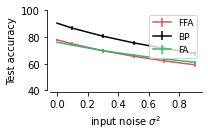

In [99]:
import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
    
with_autoencoder = False #False #True 

with_BP_FA = True ## relevant for measure_name = correlation

colors_ae = {'FA':'lightgray', 'BP':'lightgray',}
colors_tcae = {'FA':'rosybrown', 'BP':'rosybrown'}
sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for iteration in range(1):
    fig, ax = plt.subplots(1,1, figsize=[3,2])
    for method in ['SLVanilla','BP','FA']:
    
        
        itr_means, itr_sems = [], []
        for j, s in enumerate(sigmas):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        if (method in ['BP','FA']) & (with_BP_FA) & (measure_name == 'correlation'):
            ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])
        
        elif (method=='SLVanilla') or with_BP_FA:
            ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])

        
        if measure_name == 'accuracy':
            ax.set_ylim([40,100])
        elif (method in ['BP','FA']) & (with_BP_FA) & (measure_name == 'correlation'):
            pass
        else:
            ax.set_ylim([0,0.95])
            
        
#       #  -----autoencoders
        if with_autoencoder:
            if method in ['FA','BP']:
                itr_means, itr_sems = [], []
                for j, s in enumerate(sigmas):
                    method_selection = master_df_autoencoder['method']==method
                    epsilon_selection = master_df_autoencoder['epsilon']==0.0
                    sigma2_selection = (master_df_autoencoder['sigma2']-s)<0.01
                    itr = master_df_autoencoder[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
            #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
            #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                    itr_means.append(itr.mean())
                    itr_sems.append(ss.sem(itr))
                ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method]+' AE', color=colors[method], 
                            ls='--')
        
#         #  -----autoencoders two costs
#         if method in ['FA','BP']:
#             itr_means, itr_sems = [], []
#             for j, s in enumerate(sigmas):
#                 method_selection = master_df_autoencodertwocosts['method']==method
#                 epsilon_selection = master_df_autoencodertwocosts['epsilon']==0.0
#                 sigma2_selection = (master_df_autoencodertwocosts['sigma2']-s)<0.01
#                 itr = master_df_autoencodertwocosts[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
#         #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
#         #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
#                 itr_means.append(itr.mean())
#                 itr_sems.append(ss.sem(itr))
#             ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method]+'twocosts AE', color=colors_tcae[method], ls=linestyles[method])


        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
    #     ax.set_xticks(range(len(sigmas)))
    #     ax.set_xticklabels(sigmas)
        ax.set_xlabel('input noise ' +r'$\sigma^2$')
        ax.set_ylabel('Test %s'%measure_name)
        
        
        ax.spines['left'].set_position(('axes', -0.02))
        ax.spines['bottom'].set_position(('axes', -0.02))
              
        
        
#         if measure_name == 'accuracy':
#             ax.text(1.1, 1, hashname, fontsize=8, rotation=90)
        if iteration:
            ax.set_title('Robustness to noise: iteration %d'%(iteration)) #
        ax.legend(fontsize=9)
        plt.tight_layout()
    
    if with_autoencoder:
        fig.savefig(figsavedir + 'Small_%s_noise_itr%d_%s_withAEs.png'%(hashname, iteration, measure_name), dpi=200)
        fig.savefig(figsavedir + 'Small_%s_noise_itr%d_%s_withAEs.pdf'%(hashname, iteration, measure_name), dpi=200)
    else:
        fig.savefig(figsavedir + 'Small_%s_noise_itr%d_%s.png'%(hashname, iteration, measure_name), dpi=200)
        fig.savefig(figsavedir + 'Small_%s_noise_itr%d_%s.pdf'%(hashname, iteration, measure_name), dpi=200)


print(hashname, measure_name)

## Noise (sigma2)

RMSpRMSpMNISTAsymResLNet10BNaffine accuracy


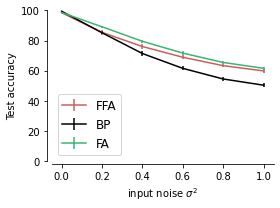

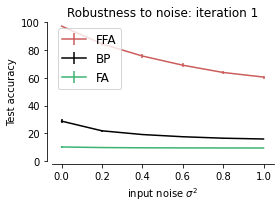

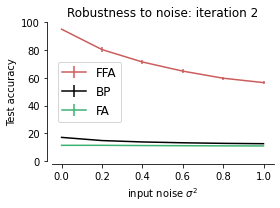

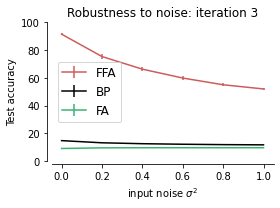

In [102]:
import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
    
with_autoencoder = False #False #True 

with_BP_FA = True ## relevant for measure_name = correlation

colors_ae = {'FA':'lightgray', 'BP':'lightgray',}
colors_tcae = {'FA':'rosybrown', 'BP':'rosybrown'}
sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for iteration in range(4):
    fig, ax = plt.subplots(1,1, figsize=[4,3])
    for method in ['SLVanilla','BP','FA']:
    
        
        itr_means, itr_sems = [], []
        for j, s in enumerate(sigmas):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        if (method in ['BP','FA']) & (with_BP_FA) & (measure_name == 'correlation'):
            ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])
        
        elif (method=='SLVanilla') or with_BP_FA:
            ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])

        
        if measure_name == 'accuracy':
            ax.set_ylim([0,100])
        elif (method in ['BP','FA']) & (with_BP_FA) & (measure_name == 'correlation'):
            pass
        else:
            ax.set_ylim([0,0.95])
            
        
#       #  -----autoencoders
        if with_autoencoder:
            if method in ['FA','BP']:
                itr_means, itr_sems = [], []
                for j, s in enumerate(sigmas):
                    method_selection = master_df_autoencoder['method']==method
                    epsilon_selection = master_df_autoencoder['epsilon']==0.0
                    sigma2_selection = (master_df_autoencoder['sigma2']-s)<0.01
                    itr = master_df_autoencoder[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
            #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
            #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                    itr_means.append(itr.mean())
                    itr_sems.append(ss.sem(itr))
                ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method]+' AE', color=colors[method], 
                            ls='--')
        
#         #  -----autoencoders two costs
#         if method in ['FA','BP']:
#             itr_means, itr_sems = [], []
#             for j, s in enumerate(sigmas):
#                 method_selection = master_df_autoencodertwocosts['method']==method
#                 epsilon_selection = master_df_autoencodertwocosts['epsilon']==0.0
#                 sigma2_selection = (master_df_autoencodertwocosts['sigma2']-s)<0.01
#                 itr = master_df_autoencodertwocosts[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
#         #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
#         #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
#                 itr_means.append(itr.mean())
#                 itr_sems.append(ss.sem(itr))
#             ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method]+'twocosts AE', color=colors_tcae[method], ls=linestyles[method])


        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
    #     ax.set_xticks(range(len(sigmas)))
    #     ax.set_xticklabels(sigmas)
        ax.set_xlabel('input noise ' +r'$\sigma^2$')
        ax.set_ylabel('Test %s'%measure_name)
        
        ax.spines['left'].set_position(('axes', -0.02))
        ax.spines['bottom'].set_position(('axes', -0.02))
#         if measure_name == 'accuracy':
#             ax.text(1.1, 1, hashname, fontsize=8, rotation=90)
        if iteration:
            ax.set_title('Robustness to noise: iteration %d'%(iteration)) #
        ax.legend(fontsize=12)
        plt.tight_layout()
    
    if with_autoencoder:
        fig.savefig(figsavedir + '%s_noise_itr%d_%s_withAEs.png'%(hashname, iteration, measure_name), dpi=200)
        fig.savefig(figsavedir + '%s_noise_itr%d_%s_withAEs.pdf'%(hashname, iteration, measure_name), dpi=200)
    else:
        fig.savefig(figsavedir + '%s_noise_itr%d_%s.png'%(hashname, iteration, measure_name), dpi=200)
        fig.savefig(figsavedir + '%s_noise_itr%d_%s.pdf'%(hashname, iteration, measure_name), dpi=200)


print(hashname, measure_name)

## Epsilon (adversarial attack)

RMSpRMSpMNISTAsymResLNet10BNaffine accuracy


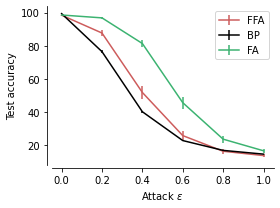

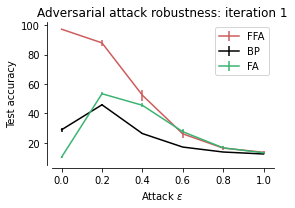

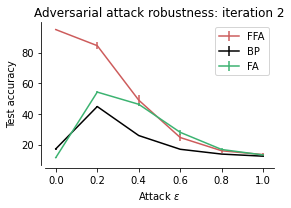

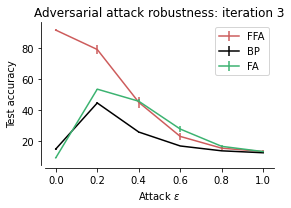

In [103]:
method = 'FA' #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}

epsilons = np.unique(master_df['epsilon'])



for iteration in range(4):
    fig, ax = plt.subplots(1,1, figsize=[4,3])
    for method in ['SLVanilla','BP','FA']:
    
        
        itr_means, itr_sems = [], []
        for j, eps in enumerate(epsilons):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==eps
            sigma2_selection = (master_df['sigma2']-0.0)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
            
        ax.errorbar(epsilons,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])

#         if measure_name == 'accuracy':
#             ax.set_ylim([0,100])
#         else:
#             ax.set_ylim([0,0.9])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
        
        ax.spines['left'].set_position(('axes', -0.02))
        ax.spines['bottom'].set_position(('axes', -0.02))


        ax.set_xlabel('Attack '+r'$\epsilon$')
        ax.set_ylabel('Test %s'%measure_name)
#         if measure_name == 'accuracy':
#             ax.text(1.1, 1, hashname, fontsize=8, rotation=90)
        if iteration:
            ax.set_title('Adversarial attack robustness: iteration %d'%(iteration)) #: iteration %d'%(iteration)
        ax.legend()
        plt.tight_layout()

    fig.savefig(figsavedir + '%s_advattack_itr%d_%s.png'%(hashname, iteration, measure_name), dpi=200)
    fig.savefig(figsavedir + '%s_advattack_itr%d_%s.pdf'%(hashname, iteration, measure_name), dpi=200)
    
print(hashname, measure_name)

## Recurrence for noise

In [109]:
plt.rcParams["font.family"] = "Arial"


### with autoencoders or without

RMSpRMSpMNISTAsymResLNet10BNaffine accuracy OR
Oct06-10-51_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_954 accuracy


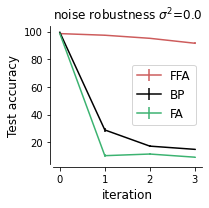

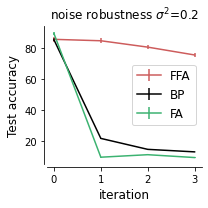

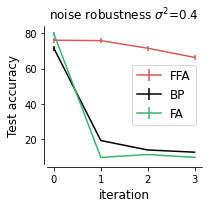

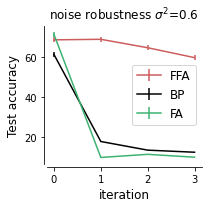

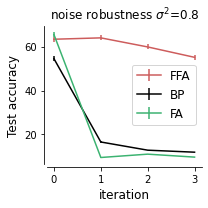

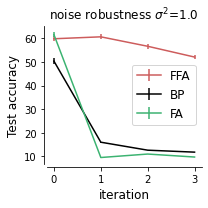

In [112]:
with_autoencoder = False #True

import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}
colors_dd = {'FA':'y', 'BP':'g', }
sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for s in sigmas:


    fig, ax = plt.subplots(1,1,figsize=[3,3])
    for method in ['SLVanilla','BP','FA']:


        itr_means, itr_sems = [], []
        for iteration in range(4):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method], color=colors[method],)
        
        if with_autoencoder:
            #-----autoencoders
            if method in ['FA','BP']:
                itr_means, itr_sems = [], []
                for iteration in range(4):
                    method_selection = master_df_autoencoder['method']==method
                    epsilon_selection = master_df_autoencoder['epsilon']==0.0
                    sigma2_selection = (master_df_autoencoder['sigma2']-s)<0.01
                    itr = master_df_autoencoder[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
            #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
            #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                    itr_means.append(itr.mean())
                    itr_sems.append(ss.sem(itr))
                ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' AE', color=colors[method], 
                            ls='--')

        
#         #-----autoencoders two costs
#         if method in ['FA','BP']:
#             itr_means, itr_sems = [], []
#             for iteration in range(4):
#                 method_selection = master_df_autoencodertwocosts['method']==method
#                 epsilon_selection = master_df_autoencodertwocosts['epsilon']==0.0
#                 sigma2_selection = (master_df_autoencodertwocosts['sigma2']-s)<0.01
#                 itr = master_df_autoencodertwocosts[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
#         #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
#         #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
#                 itr_means.append(itr.mean())
#                 itr_sems.append(ss.sem(itr))
#             ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' twocosts AE', color=colors_tcae[method], ls=linestyles[method])

        
        
        
        
#          #-----dynamic decoders
#         if method in ['FA','BP']:
#             itr_means, itr_sems = [], []
#             for iteration in range(4):
#                 method_selection = master_df_dynamic['method']==method
#                 epsilon_selection = master_df_dynamic['epsilon']==0.0
#                 sigma2_selection = (master_df_dynamic['sigma2']-s)<0.01
#                 itr = master_df_dynamic[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
#         #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
#         #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
#                 itr_means.append(itr.mean())
#                 itr_sems.append(ss.sem(itr))
#             ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' Dd', color=colors_dd[method], ls=linestyles[method])

        
        
#         if measure_name == 'accuracy':
#             ax.set_ylim([70,100])
#         else:
#             ax.set_ylim([-0.1,0.8])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
        ax.set_xticks(range(4))
    #     ax.set_xticklabels(range(4))
        ax.set_xlabel('iteration', fontsize=12)
        ax.set_ylabel('Test %s'%measure_name, fontsize=12)
    #     if measure_name == 'accuracy':
    #         ax.text(1.1, 1, hashname, fontsize=8, rotation=90)
    
        ax.spines['left'].set_position(('axes', -0.02))
        ax.spines['bottom'].set_position(('axes', -0.02))


        ax.set_title('noise robustness '+ r'$\sigma^2$=%0.1f'%(s))
        ax.legend(fontsize=12)
        plt.tight_layout()

    if with_autoencoder:
        fig.savefig(figsavedir + '%s_noise_sigma2_%s_%s_withAEs.png'%(hashname,s, measure_name), dpi=200)
        fig.savefig(figsavedir + '%s_noise_sigma2_%s_%s_withAEs.pdf'%(hashname,s, measure_name), dpi=200)
        
    else:
        fig.savefig(figsavedir + '%s_noise_sigma2_%s_%s.png'%(hashname,s, measure_name), dpi=200)
        fig.savefig(figsavedir + '%s_noise_sigma2_%s_%s.pdf'%(hashname,s, measure_name), dpi=200)

        
print(hashname, measure_name, 'OR')
print(runname, measure_name)

In [36]:
master_df_autoencodertwocosts

,method,epsilon,sigma2,itr0,itr1,itr2,itr3
0,FA,0.0,0.901,48.828,44.141,35.938,31.250
1,FA,0.0,0.101,74.219,50.000,33.984,37.109
2,BP,0.0,0.501,60.547,45.312,37.891,37.109
3,FA,0.0,0.301,64.844,47.266,38.281,30.469
4,BP,0.0,0.001,89.453,60.156,48.047,38.281
5,FA,0.0,0.701,51.172,42.578,35.547,30.078
6,BP,0.0,0.101,83.203,55.078,48.438,34.766
7,BP,0.0,0.601,58.203,48.438,33.594,32.031
8,FA,0.0,0.801,48.828,42.188,38.672,29.297
9,BP,0.0,0.201,81.250,50.000,43.750,35.156
